In [1]:
from deep_learning_models import *
from helper.dataset_reader import read_tsv
from helper.data_transformer import *
from sklearn.model_selection import train_test_split
from utils import *
import pandas as pd

In [2]:
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.9.0
GPU detected: []


In [3]:
data = read_tsv('../../dataset/comlid-data-140422-v1.tsv')

In [4]:
all_data, all_words, all_tags = data

In [5]:
df = list_to_dataframe(data)

In [6]:
words = get_unique_words(df)
tags = get_unique_tags(df)

In [7]:
tags

['MIX-JV-EN', 'MIX-ID-JV', 'EN', 'O', 'JV', 'MIX-ID-EN', 'ID']

In [8]:
dt_pair = to_token_tag_list(data)

In [9]:
X, y = input_data(words, tags, dt_pair)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
num_words = len(words)
num_tags = len(tags)
max_len = 100
model = blstm_model(num_words, num_tags, max_len)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1344500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 50)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 100, 7)           1407      
 ibuted)                                                         
                                                             

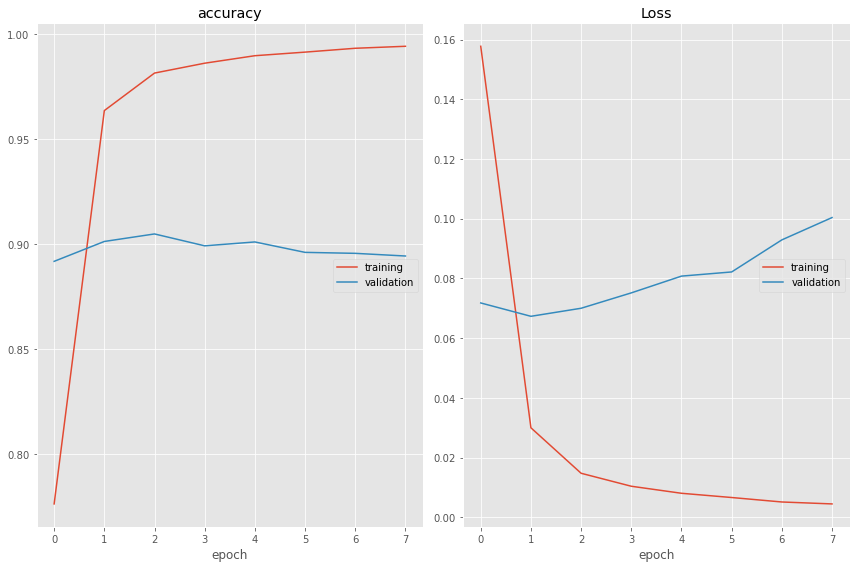

accuracy
	training         	 (min:    0.776, max:    0.994, cur:    0.994)
	validation       	 (min:    0.892, max:    0.905, cur:    0.894)
Loss
	training         	 (min:    0.004, max:    0.158, cur:    0.004)
	validation       	 (min:    0.067, max:    0.100, cur:    0.100)

Epoch 8: val_loss did not improve from 0.06731
56/56 [==============================] - 2s 37ms/step - loss: 0.1009 - accuracy: 0.8931
[0.10094455629587173, 0.8931381702423096]


In [12]:
root_path = 'model/'
model_name = 'blstm_model.h5'
model_fitting(model, root_path, model_name, x_train, y_train, x_test, y_test, num_epoch=50, batch_sz=32)

In [13]:
from keras.models import load_model

mdl = load_model('model/blstm_model.h5')

In [14]:
all_w_pair = []
all_true_pair = []
all_pred_pair = []

for i in range(len(x_test)):
    p = mdl.predict(np.array([x_test[i]]))
    p = np.argmax(p, axis=-1)
    y_true = y_test[i]
    w_pair = []
    true_pair = []
    pred_pair = []
    for w, true, pred in zip(x_test[i], y_true, p[0]):
        if words[w-1] != "ENDPAD":
            # print("{:30}{:10}\t{}".format(words[w-1], tags[true], tags[pred]))
            w_pair.append(words[w-1])
            true_pair.append(tags[true])
            pred_pair.append(tags[pred])
    all_w_pair.append(w_pair)
    all_true_pair.append(true_pair)
    all_pred_pair.append(pred_pair)

1/1 [==============================] - 0s 30ms/step


In [15]:
all_true_pair

[['JV', 'JV', 'JV', 'JV', 'O', 'EN', 'JV', 'JV', 'JV'],
 ['O',
  'ID',
  'ID',
  'ID',
  'EN',
  'ID',
  'ID',
  'MIX-ID-EN',
  'ID',
  'ID',
  'ID',
  'EN',
  'ID',
  'EN',
  'EN',
  'ID',
  'O',
  'EN',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O'],
 ['ID',
  'ID',
  'MIX-ID-EN',
  'ID',
  'O',
  'O',
  'O',
  'ID',
  'ID',
  'MIX-ID-EN',
  'ID',
  'O',
  'O',
  'O'],
 ['O', 'ID', 'ID', 'EN', 'ID', 'O', 'ID', 'EN', 'ID', 'O'],
 ['JV',
  'EN',
  'O',
  'JV',
  'MIX-ID-JV',
  'JV',
  'O',
  'EN',
  'O',
  'JV',
  'JV',
  'JV',
  'O',
  'JV',
  'JV',
  'ID',
  'JV',
  'O'],
 ['ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'EN',
  'EN',
  'O',
  'ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O'],
 ['O',
  'O',
  'O',
  '

In [16]:
true_flat = [item for sublist in all_true_pair for item in sublist]
pred_flat = [item for sublist in all_pred_pair for item in sublist]

              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     21899
          JV       0.87      0.83      0.85      4798
          EN       0.94      0.84      0.89      5388
   MIX-ID-EN       0.98      0.82      0.89       993
   MIX-ID-JV       0.99      0.79      0.88       306
   MIX-JV-EN       0.96      0.85      0.90       245
           O       0.92      0.83      0.87     10091

    accuracy                           0.90     43720
   macro avg       0.94      0.85      0.89     43720
weighted avg       0.90      0.90      0.90     43720



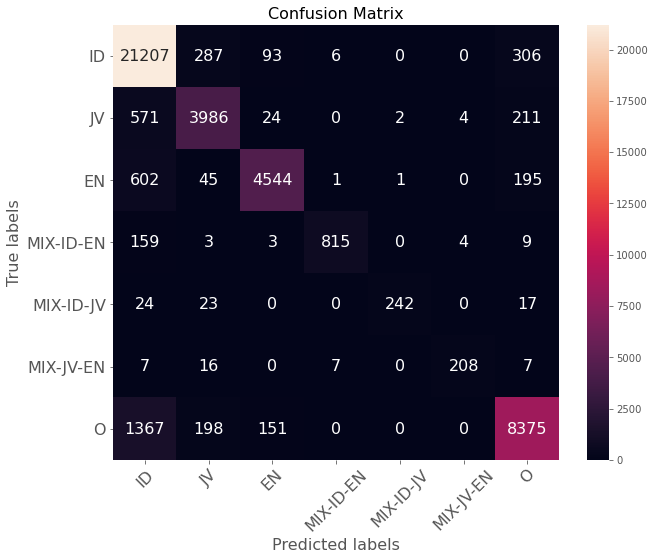

In [17]:
performance_report(true_flat, pred_flat)

In [18]:
df_ = pd.DataFrame({
    'word': all_w_pair,
    'true': all_true_pair,
    'pred': all_pred_pair
})

In [19]:
token_true_pred = []
for index, row in df_.iterrows():
    pair = list(zip(row['word'], row['true'], row['pred']))
    token_true_pred.append(pair)

In [20]:
true_pred_file = 'tagging_result/compare_results.tsv'
with open(true_pred_file, "a", encoding='utf-8') as f:
    f.write("Word" + "\t" + "True" + "\t" + "Predict" + "\n")

    for index, row in df_.iterrows():
        for tkn, t_true, t_pred in (zip(row['word'], row['true'], row['pred'])):
            f.write(tkn + '\t' + t_true + '\t' + t_pred + '\n')
        f.write('\n')

f.close()

In [21]:
i = np.random.randint(0, x_test.shape[0]) #659
p = mdl.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:30}{:10}\t {}\n".format("Word", "True", "Pred"))
print("-" *60)

for w, true, pred in zip(x_test[i], y_true, p[0]):
    if words[w-1] != "ENDPAD":
        print("{:30}{:10}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 0s 31ms/step
Word                          True      	 Pred

------------------------------------------------------------
alhamdulillah                 ID        	ID
ya                            ID        	ID
Allah                         O         	O
rezeki                        ID        	ID
dibulan                       ID        	ID
ramadhan                      O         	O
,                             O         	O
terima                        ID        	ID
kasih                         ID        	ID
banyak                        ID        	ID
buat                          ID        	ID
@christaline_                 O         	ID
dan                           ID        	ID
sponsor                       ID        	ID
@AFTERDEATH_NFT               O         	ID
dan                           ID        	ID
ga                            ID        	ID
lupa                          ID        	ID
juga                          ID        	ID
admin 